# Distribución de probabilidad Binomial
1. Una distribución de probabilidad es una distribución que indica la probabilidad de cada valor de la variable aleatoria. 
2. A menudo se expresa como gráfica, tabla o fórmula.
3. Una distribución de probabilidad es como una distribución de frecuencias, 
    + en dónde la frecuencia o valor correspondiente a cada valor de x es un valor de probabilidad.
###### Ver Distribución discreta de probabilidad binomial en: https://www.chreinvent.com/recursos/distribuci%C3%B3n-binomial    

In [1]:
import math
from statistics import mean, median, mode, variance, stdev
from itertools import accumulate
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import binom

## Programas de estudiantes de medicina
Se realizó un estudio para determinar si existían diferencias significativas entre estudiantes de medicina aceptados a través de programas especiales (como el de acción afirmativa) y estudiantes de medicina aceptados a través de los criterios regulares de admisión. 
+ Se encontró que el 94% de los estudiantes de medicina aceptados a través de programas especiales se graduaron (según datos del Journal of the American Medical Association).
    + a. Si se seleccionan al azar 10 de los estudiantes de los programas especiales, calcule la probabilidad de que al menos nueve se gradúen.
    + b. ¿Sería infrecuente que de 10 estudiantes de los programas especiales, seleccionados al azar, solamente se graduaran siete? ¿Por qué?

### Parametros

In [2]:
# Definición de parámetros del problema
n = 10  # Número de estudiantes
p = 0.94  # Probabilidad de graduarse
x = [ x for x in range(n+1)] # x varia de 0 a n

### Construcción de la distribución binomial

In [3]:
# Calculo de la distribución de probabilidad binomial
# Lista con las probabilidades simples para cada x
d_prob = [binom.pmf(x, n, p) for x in range(n + 1)]

# Lista con las probabilidades acumuladas para cada x
d_prob_ac = list(accumulate(d_prob))

# Lista con las probabilidades acumuladas en orden inverso
d_prob_ac_inv = list(accumulate(d_prob[::-1]))[::-1]

# Imprimir cada número con dos decimales usando f-string # for num in dist_prob_ac: print(f"{num:.2f}")

### Tabla y Gráficos
+ Probabilidades: La suma de la probabilidad debe dar 1
+ Media: La suma-producto de x por su probabilidad debe dar la media
+ Varianza: La suma-producto de x al cuadrado por la probabilidad menos la media debe dar la varianza
+ Desviación Estandard: La raiz cuadrada de la varianza debe dar la desviación estandard

In [4]:
# Dataframe: Tabla de datos
df_gr = pd.DataFrame(
    {
        'x': x,
        'p': d_prob,
        'x.p': [x[i] * d_prob[i] for i in range(n+1)],
        'xx.p': [x[i]**2 * d_prob[i] for i in range(n+1)],
        'p-acu': d_prob_ac,
        'p-acr': d_prob_ac_inv      
    }
)
print(df_gr.round(3).set_index('x'))


        p    x.p    xx.p  p-acu  p-acr
x                                     
0   0.000  0.000   0.000  0.000  1.000
1   0.000  0.000   0.000  0.000  1.000
2   0.000  0.000   0.000  0.000  1.000
3   0.000  0.000   0.000  0.000  1.000
4   0.000  0.000   0.000  0.000  1.000
5   0.000  0.001   0.004  0.000  1.000
6   0.002  0.011   0.068  0.002  1.000
7   0.017  0.118   0.824  0.019  0.998
8   0.099  0.790   6.320  0.118  0.981
9   0.344  3.094  27.848  0.461  0.882
10  0.539  5.386  53.862  1.000  0.539



Estadísticos:
Sumatoria de probabilidades: 1.0000000000000002
Media y Esperanza          : 9.400000000000002
Varianza                   : 0.564
Desviación Estandard       : 0.751
Revisión de estadísticos por scipy:
mean: 9.40, var: 0.56, skew: -1.17, kurt: 1.17.


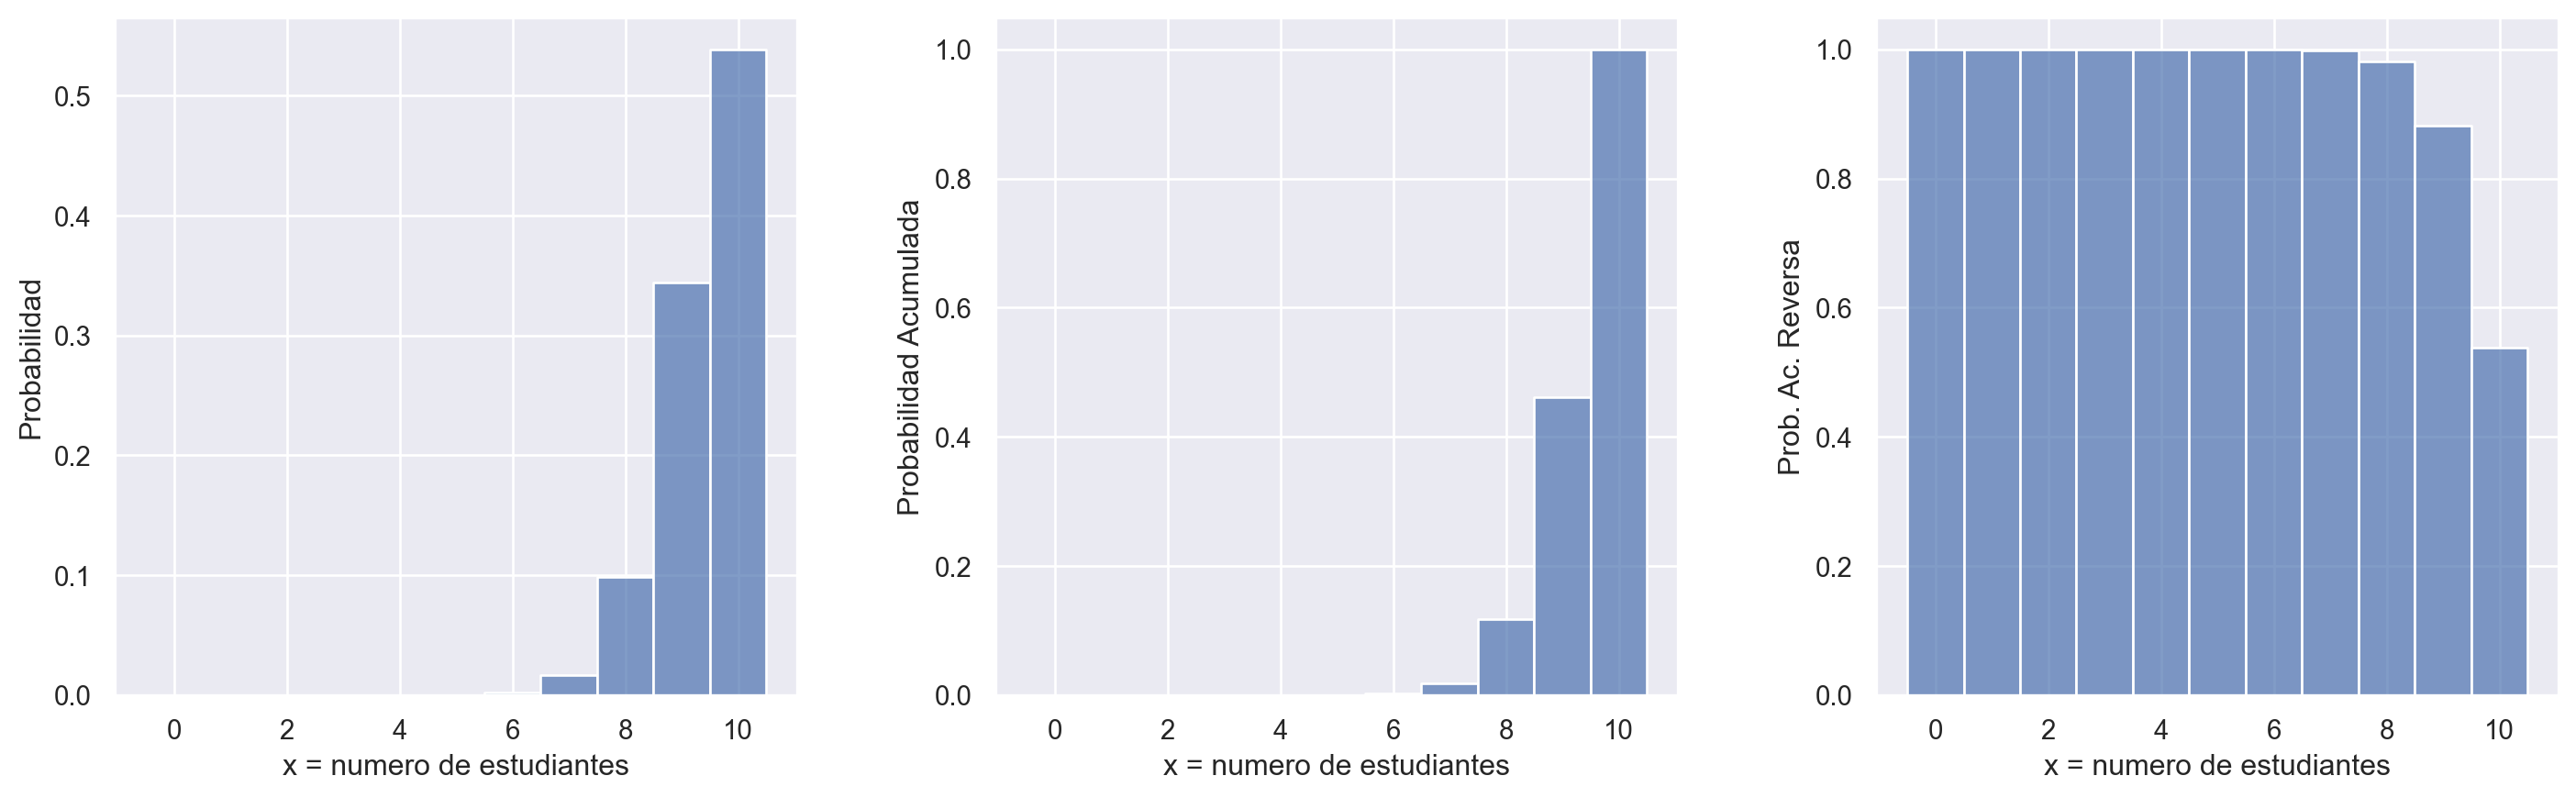

In [10]:

# Estadisticos: Calculo de la media de la distribución de probabilidad
print(f"\nEstadísticos:")

# Calculos: sumatoria de probabilidades, media, varianza y desviación estandard
sumprob = df_gr.p.sum()
media = df_gr['x.p'].sum()
sum_xx_p = df_gr['xx.p'].sum()
varianza = sum_xx_p - media ** 2
desvstan = math.sqrt(varianza)

# Impresión de estadísticos
print(f"Sumatoria de probabilidades: {sumprob}")
print(f"Media y Esperanza          : {media}")
print(f"Varianza                   : {varianza:.3f}")
print(f"Desviación Estandard       : {desvstan:.3f}")

# Revisión de estadísticos por Scipy
# La función de distribución binomial de SciPy binom.stats devuelve: Los momentos de primero a cuarto orden:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

print("Revisión de estadísticos por scipy:")
print(f"mean: {mean:.2f}, var: {var:.2f}, skew: {skew:.2f}, kurt: {kurt:.2f}.")

# Gráficos
# Distribución de probabilidad binomial
f = mpl.figure.Figure(figsize=(15, 5))
sf1, sf2, sf3 = f.subfigures(1, 3)

# Visualización Probabilidades
(
    so.Plot(df_gr, x="x", y="p")
    .add(so.Bars(),)
    .label(x="x = numero de estudiantes", y="Probabilidad")
    .on(sf1)
    .plot()
)

# Visualización Probabilidades Acumuladas
(
    so.Plot(df_gr, x="x", y="p-acu")
    .add(so.Bars())
    .label(x="x = numero de estudiantes", y="Probabilidad Acumulada")
    .on(sf2)
    .plot()
)

# Visualización Probabilidades Acumuladas Invertidas
(
    so.Plot(df_gr, x="x", y="p-acr")
    .add(so.Bars())
    .label(x="x = numero de estudiantes", y="Prob. Ac. Reversa")
    .on(sf3)
)



##### Observaciones:
+ El numero de estudiantes de programas especiales que probablemente aprueben está cercano al 9: 1. (Esperanza: 9.400000000000002)
    + La probabilidad de que esto suceda 34% (0.347).
+ La distribución está sesgada a la izquierda (sesgo negativo):
    + La probabilidad (simple) crece por encima del valor esperado.
    + La probabilidad (acumulada) crece en tanto se tomen más alumnos dentro de la muestra.
        + quiere decir que la probabilidad que aprueben pocos es baja.
    + El desvío es menor a un alumno. (cercano al 9)

### Resultados más esperables y menos esperables
Regla práctica del intervalo: a) valor mínimo + común   : media - dos desvíos estandard.    b) valor máximo + común  : media  + dos desvios estandard.  

In [6]:
# Calculos de valores minimo y máximo comunes dentro de los cuales se encuentra el 95% 
# de los valores de la distribución de probabilidad.
val_min_comun = media - 2 * desvstan
val_max_comun = media + 2 * desvstan

# Impresión de resultados
print(f"Intervalo de confianza:")
print(f"media: {media:.2f}, desv.std.: {desvstan:.2f}, 2 x desv.: {2*desvstan:.2f}.")
print(f"Valor mínimo más común: {val_min_comun:.2f} y Valor máximo más común: {val_max_comun:.2f}")
print(f"Los valores más probables de x están entre {val_min_comun:.2f} y {val_max_comun:.2f}")
print(f"El valor más esperable es: {media:.2f}")

Intervalo de confianza:
media: 9.40, desv.std.: 0.75, 2 x desv.: 1.50.
Valor mínimo más común: 7.90 y Valor máximo más común: 10.90
Los valores más probables de x están entre 7.90 y 10.90
El valor más esperable es: 9.40


**Interpretación:** El intevalo de confianza refleja que:
+ Es esperable que cantidad de alumnos estén entre 6 y 10 en el 95% de los casos.
    + El 95% de los resultados más probables se encuentra sesgado a la derecha (sesgo positivo):
        + Es más probable que existan más alumnos que aprueben que menos alumnos que prueben.
        + Es poco probable que pocos alumnos aprueben dentro de la muestra.
    + El 5% de los resultados menos probables se encuentran a la izquierda.
        + Para menos de 6 alumnos, la probabilidad decrece significativamente (p-acr).
        + Es difícil que por azar solamente entre 0 y 6 alumnos que aprueben.

#### Resultados infrecuentes
+ Uso de las probabilidades para determinar resultados infrecuentes
    + Número de éxitos inusualmente alto: x éxitos en n ensayos es un número inusualmente alto de éxitos si P(x o más)  0.05.*
    + Número de éxitos inusualmente bajo: x éxitos en n ensayos es un número inusualmente bajo de éxitos si P(x o menos)  0.05.*
+ *El valor de 0.05 se utiliza de forma regular (coincide con el intervalo de confianza 95%), pero no es absolutamente rígido. 
    + Se podrían usar otros valores, como 0.01, para distinguir entre sucesos que pueden ocurrir con facilidad por azar y sucesos que tienen muy pocas probabilidades de ocurrir por azar.

        p    x.p    xx.p  p-acu  p-acr
x                                     
0   0.000  0.000   0.000  0.000  1.000
1   0.000  0.000   0.000  0.000  1.000
2   0.000  0.000   0.000  0.000  1.000
3   0.000  0.000   0.000  0.000  1.000
4   0.000  0.000   0.000  0.000  1.000
5   0.000  0.001   0.004  0.000  1.000
6   0.002  0.011   0.068  0.002  1.000
7   0.017  0.118   0.824  0.019  0.998
8   0.099  0.790   6.320  0.118  0.981
9   0.344  3.094  27.848  0.461  0.882
10  0.539  5.386  53.862  1.000  0.539


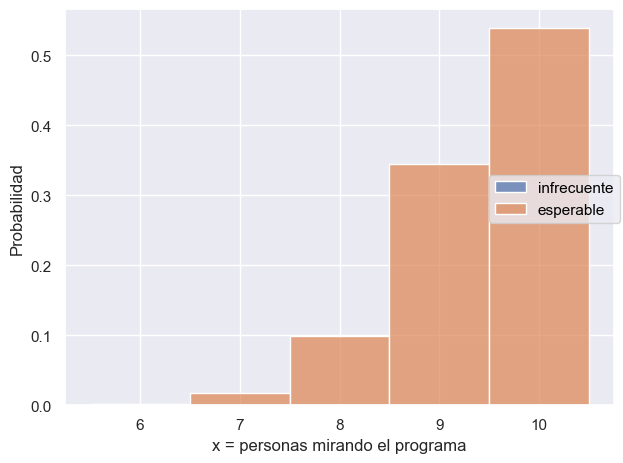

In [7]:
df_m = df_gr.round(3).set_index('x')
print(df_m)
# Añadir una columna de color
df_m['Miembros'] = ['esperable' if i > 5 else 'infrecuente' for i in df_gr['x']]

# Crear la figura y los ejes usando seaborn.objects
hist = (
    so.Plot(df_m, x='x', y='p', color='Miembros')
    .add(so.Bars())
    .label(x="x = personas mirando el programa", y="Probabilidad", color="")
)

# Mostrar el gráfico , color = df_miembros['x'][df_miembros['x'] < 8]
hist.show()

**Resultados infrecuentes:**
+ La regla del intervalo nos dice que los resultados infrecuentes son aquellos con una probabilidad acumulada menor al 5%.
+ Se utiliza la probabilidad acumulada porque aunque los resultados son muy poco probables, siguen teniendo una probabilidad.
    + Estamos hablando de una baja probabilidad de 0 o 1 o 2 o 3 o 4 o 5 o 6 de un conjunto de 10 alumnos.
    + La probabilidad acumulada (['p-acu'] ) aumenta mucho al principio pero casi nada al pasar 6 personas.
        + Esta probabilidad se hace significativa (> 5% cuando x >= 5)
    + La probabilidad acumulada invertida (['p-acr']) disminuye abruptamente a partir de 6 personas (desde 10 a 0).
+ Se ve como que aprueben 7 o más alumnos desde 10 ya se cubre el 95% de los casos más probables. (en la probabilidad acumulada reversa)
+ Se ve que aprueben entre 0 y 6 alumnos cubre el 5% de los casos probables.

### Analisis de riesgo
#### ¿Que aprueben 6 personas o menos es frecuente o infrecuente?
Se ve a priori 6 es el límite en este caso particular.

In [8]:
# Revisamos las probabilidades acumuladas untilzando el criterio el criterio visto hasta ahora:
print(df_m[['p', 'p-acu','Miembros']])
print("Ver la tabla y la grafica de probabilidad acumulada")

        p  p-acu     Miembros
x                            
0   0.000  0.000  infrecuente
1   0.000  0.000  infrecuente
2   0.000  0.000  infrecuente
3   0.000  0.000  infrecuente
4   0.000  0.000  infrecuente
5   0.000  0.000  infrecuente
6   0.002  0.002    esperable
7   0.017  0.019    esperable
8   0.099  0.118    esperable
9   0.344  0.461    esperable
10  0.539  1.000    esperable
Ver la tabla y la grafica de probabilidad acumulada


**Observación**
Como se ve en la tabla y en la grafica la cantindad de alumnos que aprueban suele ser mayor que 6:
+ Si nos remitimos a la tabla obtenemos el siguiente resultado:
    + P(6 o menos alumnos que aprueban) =
    + P(6 o ... 3 o 2 o 1 o 0) = **0.002**

**Interpretación**
+ **6** alumnos aprobados es un suceso infrecuente.
+ Una selección y composición con 6 alumnos como esta, **no implica necesariamente un suceso imposible.**.
+ Una selección y composición con 6 miembros como esta, **si implica un suceso infrecuente**.

# Preguntas
#### Si se seleccionan al azar 10 de los estudiantes de los programas especiales, calcule la probabilidad de que al menos nueve se gradúen.

In [9]:
n = 10  # Número de sujetos
p = 0.94  # Probabilidad de mirar el programa

probabilidad_aprobados = 0
x = 0 # varía de 0 a 9
almenos = 9

for x in range(0,almenos+1):
  probabilidad_x = binom.pmf(x, n, p)
  probabilidad_aprobados += probabilidad_x

print(f"Probabilidad de al menos 9 aprobados es: {probabilidad_aprobados}")
print(f"Esta probabilidad acumulada debe coincidir con la que se calculó al construir la tabla.")

Probabilidad de al menos 9 aprobados es: 0.4613848859051007
Esta probabilidad acumulada debe coincidir con la que se calculó al construir la tabla.


#### ¿Sería infrecuente que de 10 estudiantes de los programas especiales, selecciona, solamente se graduaran siete?
No. No sería infrecuente porque la probabilidad de este suceso es 17% mayor que 0,05 como puede verse en la tabla y en la grafica.

__________________________________________________________________________________________________________________________